In [1]:
# Import packages
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('diagonalizaton_results.csv')

In [3]:
df.drop(df[df.Iteration==0].index, inplace=True)

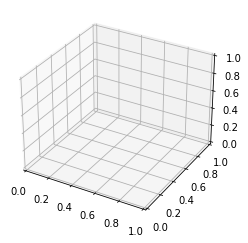

In [4]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(2,3,4) # plot the point (2,3,4) on the figure
# plt.show()

In [5]:
df.head()

,Unnamed: 0,offer_01,offer_02,offer_03,bids_01,bids_02,bids_03,Time,Iteration
24,0,0.0,0.0,0.0,0.353815,0.482839,0.352620,16,1
25,1,0.0,0.0,0.0,1.075765,0.880727,0.596626,17,1
26,2,0.0,0.0,0.0,1.328176,1.132224,1.493217,18,1
27,3,0.0,0.0,0.0,0.869774,1.575653,1.484014,19,1
28,4,0.0,0.0,0.0,1.421277,2.869346,1.552954,20,1


<AxesSubplot:>

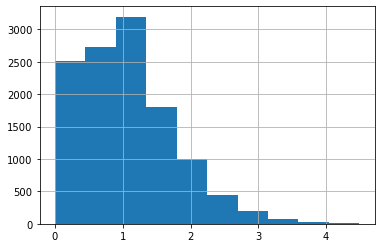

In [6]:
df["bids_01"].hist()

In [7]:
x = df['bids_01']
y=  df.Iteration
z=  df.Time

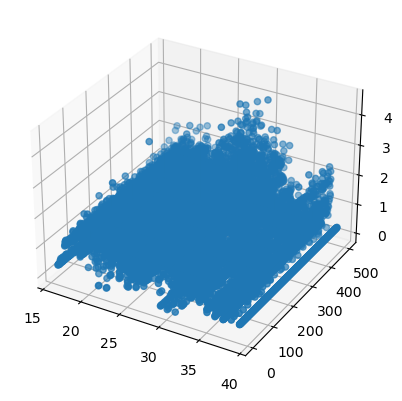

In [73]:
plt.rcParams.update(plt.rcParamsDefault)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(z, y, x, marker='o')

plt.show()

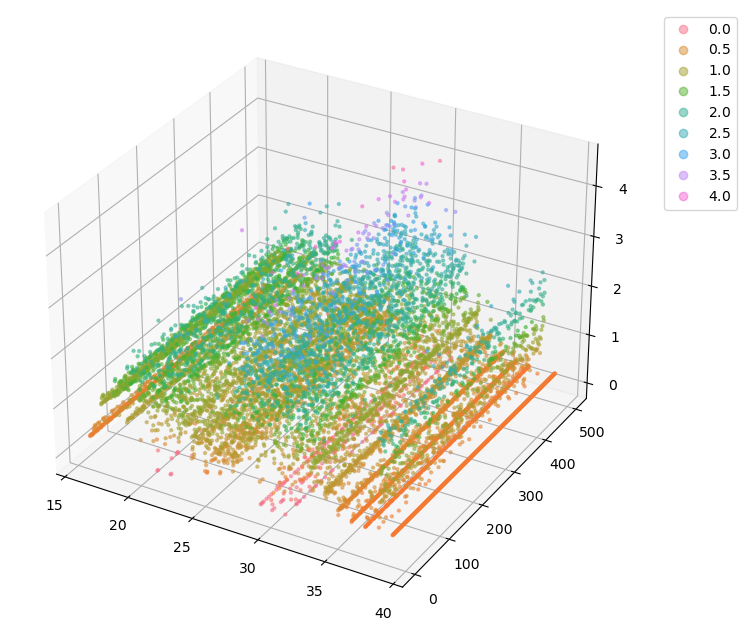

In [86]:
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

sc = ax.scatter(z, y, x, s=max(x), c=x, marker='o', cmap=cmap, alpha=0.5)

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()


NameError: name 'y' is not defined

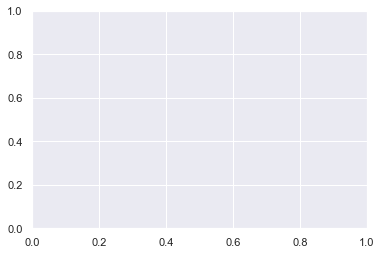

In [58]:
fig = plt.figure()

ax = fig.add_subplot(111)


ax.plot(y, x)

plt.show()


In [59]:
x=df.bids_01[df.Time==16]
z=df.Iteration[df.Time==16]

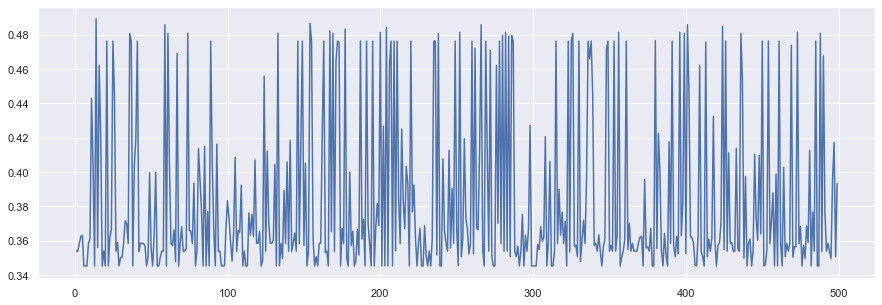

In [60]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(z, x)
plt.show()

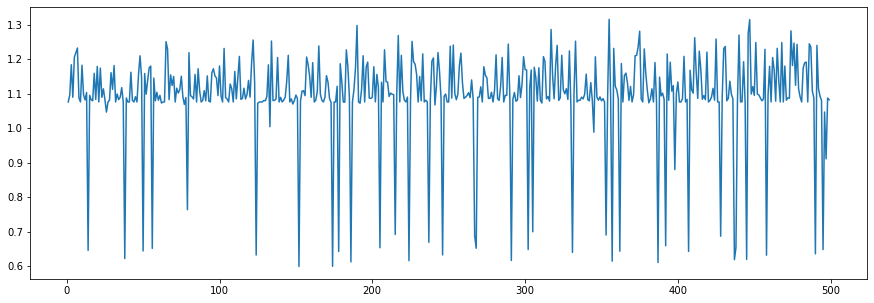

In [39]:
x=df.bids_01[df.Time==17]
z=df.Iteration[df.Time==17]
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(z, x)
plt.show()

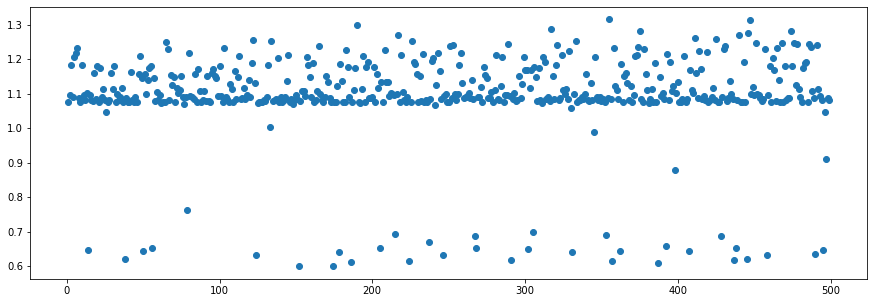

In [44]:
x=df.bids_01[df.Time==17]
y=df.Time[df.Time==17]
z=df.Iteration[df.Time==17]

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.scatter(z,x)
plt.show()

# Seaborn 01

In [22]:
import seaborn as sns
sns.set()

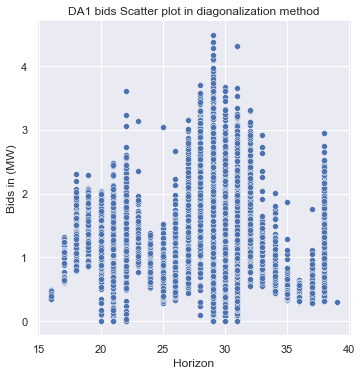

In [47]:
# fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27)
# plt.figure(figsize=(20,5));
ax= sns.relplot(data=df, x='Time', y='bids_01');
ax.set(xlabel='Horizon', title='DA1 bids Scatter plot in diagonalization method', ylabel='Bids in (MW)');
ax.savefig('DA1_bids_scatter_plot.png', dpi=100)
# fig1 = plt.gcf()
# plt.show()
# plt.draw()
# # fig1.savefig('DA1_bids_scatter_plot.png', dpi=100, tight=True)

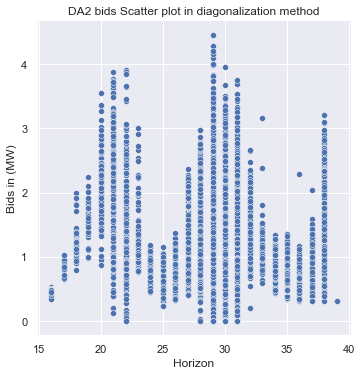

In [48]:
ax= sns.relplot(data=df, x='Time', y='bids_02');
ax.set(xlabel='Horizon', title='DA2 bids Scatter plot in diagonalization method', ylabel='Bids in (MW)');
ax.savefig('DA2_bids_scatter_plot.png', dpi=100)

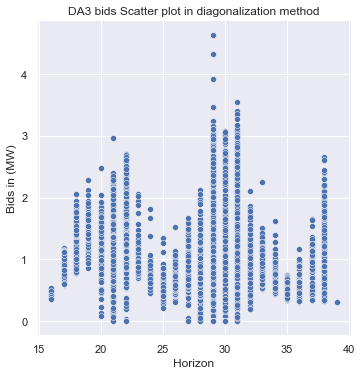

In [49]:
ax= sns.relplot(data=df, x='Time', y='bids_03');
ax.set(xlabel='Horizon', title='DA3 bids Scatter plot in diagonalization method', ylabel='Bids in (MW)');
ax.savefig('DA3_bids_scatter_plot.png', dpi=100)

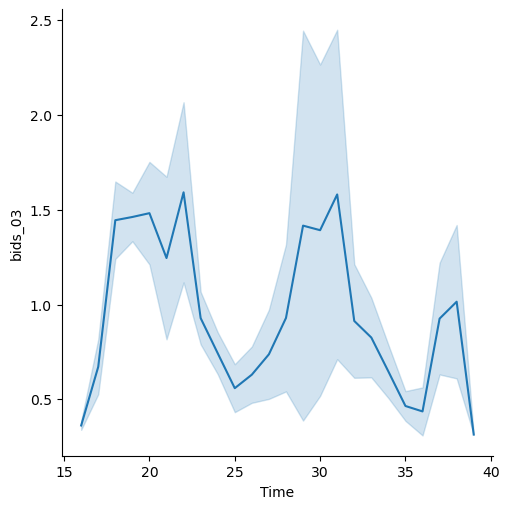

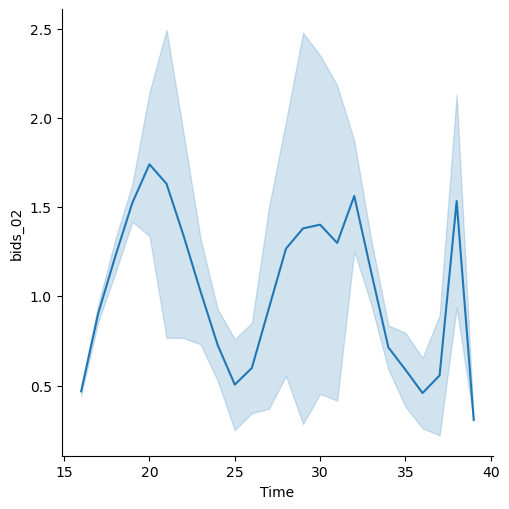

In [89]:
ax= sns.relplot(data=df, x='Time', y='bids_03', kind='line', ci='sd');
ax= sns.relplot(data=df, x='Time', y='bids_02', kind='line', ci='sd');

## pivoting

In [90]:
df

,Unnamed: 0,offer_01,offer_02,offer_03,bids_01,bids_02,bids_03,Time,Iteration
24,0,0.0,0.0,0.0,0.353815,0.482839,0.352620,16,1
25,1,0.0,0.0,0.0,1.075765,0.880727,0.596626,17,1
26,2,0.0,0.0,0.0,1.328176,1.132224,1.493217,18,1
27,3,0.0,0.0,0.0,0.869774,1.575653,1.484014,19,1
28,4,0.0,0.0,0.0,1.421277,2.869346,1.552954,20,1
...,...,...,...,...,...,...,...,...,...
11995,19,0.0,0.0,0.0,0.421099,1.076527,0.443894,35,499
11996,20,0.0,0.0,0.0,0.316411,0.490073,0.318159,36,499
11997,21,0.0,0.0,0.0,0.289869,0.536392,0.336686,37,499
11998,22,0.0,0.0,0.0,1.319412,1.110696,1.348105,38,499


In [94]:
df2 = df[["bids_01","bids_02","bids_03","Time"]].copy()

In [95]:
df2

,bids_01,bids_02,bids_03,Time
24,0.353815,0.482839,0.352620,16
25,1.075765,0.880727,0.596626,17
26,1.328176,1.132224,1.493217,18
27,0.869774,1.575653,1.484014,19
28,1.421277,2.869346,1.552954,20
...,...,...,...,...
11995,0.421099,1.076527,0.443894,35
11996,0.316411,0.490073,0.318159,36
11997,0.289869,0.536392,0.336686,37
11998,1.319412,1.110696,1.348105,38


In [99]:
df2.pivot(values=["bids_01","bids_02","bids_03"], columns="Time")

bids_01                                                              \
Time         16        17        18        19        20  21  22  23  24  25   
24     0.353815       NaN       NaN       NaN       NaN NaN NaN NaN NaN NaN   
25          NaN  1.075765       NaN       NaN       NaN NaN NaN NaN NaN NaN   
26          NaN       NaN  1.328176       NaN       NaN NaN NaN NaN NaN NaN   
27          NaN       NaN       NaN  0.869774       NaN NaN NaN NaN NaN NaN   
28          NaN       NaN       NaN       NaN  1.421277 NaN NaN NaN NaN NaN   
...         ...       ...       ...       ...       ...  ..  ..  ..  ..  ..   
11995       NaN       NaN       NaN       NaN       NaN NaN NaN NaN NaN NaN   
11996       NaN       NaN       NaN       NaN       NaN NaN NaN NaN NaN NaN   
11997       NaN       NaN       NaN       NaN       NaN NaN NaN NaN NaN NaN   
11998       NaN       NaN       NaN       NaN       NaN NaN NaN NaN NaN NaN   
11999       NaN       NaN       NaN       NaN       NaN NaN NaN NaN NaN NaN   

       ... bids_03                                                          \
Time   ...      30  31  32  33  34        35        36        37        38   
24     ...     NaN NaN NaN NaN NaN       NaN       NaN       NaN       NaN   
25     ...     NaN NaN NaN NaN NaN       NaN       NaN       NaN       NaN   
26     ...     NaN NaN NaN NaN NaN       NaN       NaN       NaN       NaN   
27     ...     NaN NaN NaN NaN NaN       NaN       NaN       NaN       NaN   
28     ...     NaN NaN NaN NaN NaN       NaN       NaN       NaN       NaN   
...    ...     ...  ..  ..  ..  ..       ...       ...       ...       ...   
11995  ...     NaN NaN NaN NaN NaN  0.443894       NaN       NaN       NaN   
11996  ...     NaN NaN NaN NaN NaN       NaN  0.318159       NaN       NaN   
11997  ...     NaN NaN NaN NaN NaN       NaN       NaN  0.336686       NaN   
11998  ...     NaN NaN NaN NaN NaN       NaN       NaN       NaN  1.348105   
11999  ...     NaN NaN NaN NaN NaN       NaN       NaN       NaN       NaN   

                 
Time         39  
24          NaN  
25          NaN  
26          NaN  
27          NaN  
28          NaN  
...         ...  
11995       NaN  
11996       NaN  
11997       NaN  
11998       NaN  
11999  0.313502  

[11976 rows x 72 columns]

In [112]:
df2 = pd.melt(df2, id_vars=["Time"], var_name="Bidder", value_name='obj_value')

In [113]:
df2

,Time,Bidder,obj_value
0,16,bids_01,0.353815
1,17,bids_01,1.075765
2,18,bids_01,1.328176
3,19,bids_01,0.869774
4,20,bids_01,1.421277
...,...,...,...
35923,35,bids_03,0.443894
35924,36,bids_03,0.318159
35925,37,bids_03,0.336686
35926,38,bids_03,1.348105


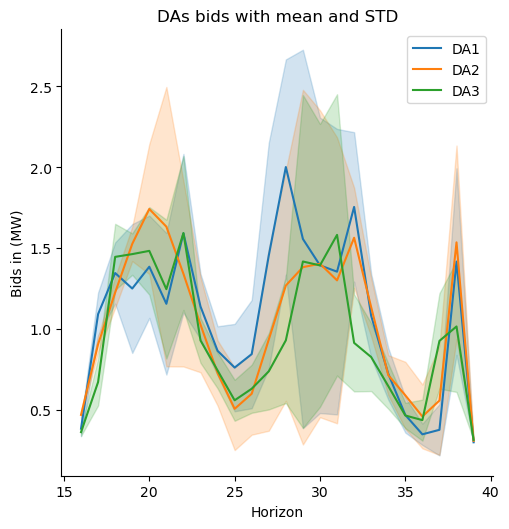

In [141]:
ax= sns.relplot(data=df2, x='Time', y='obj_value', kind='line', ci='sd', hue='Bidder', legend=False);
ax.set(xlabel='Horizon', title='DAs bids with mean and STD', ylabel='Bids in (MW)');
plt.legend(loc='upper right', labels=['DA1', 'DA2', 'DA3'])
ax.savefig('DAs_bids_STD_plot.png', dpi=100)

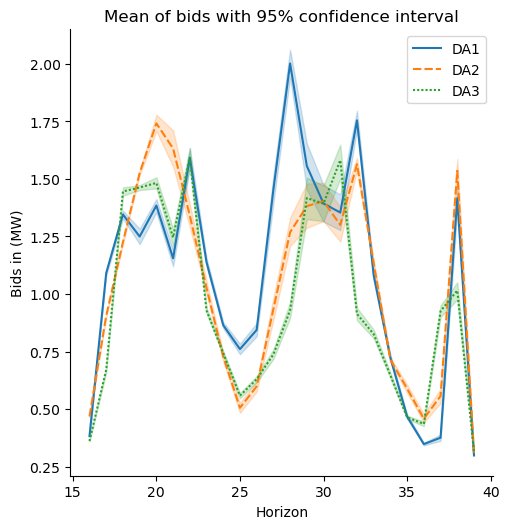

In [140]:
ax= sns.relplot(data=df2, x='Time', y='obj_value', kind='line', hue='Bidder', style='Bidder', legend=False);
ax.set(xlabel='Horizon', title='Mean of bids with 95% confidence interval', ylabel='Bids in (MW)');
plt.legend(loc='upper right', labels=['DA1', 'DA2', 'DA3'])
ax.savefig('DAs_bids_MEAN_plot.png', dpi=100)

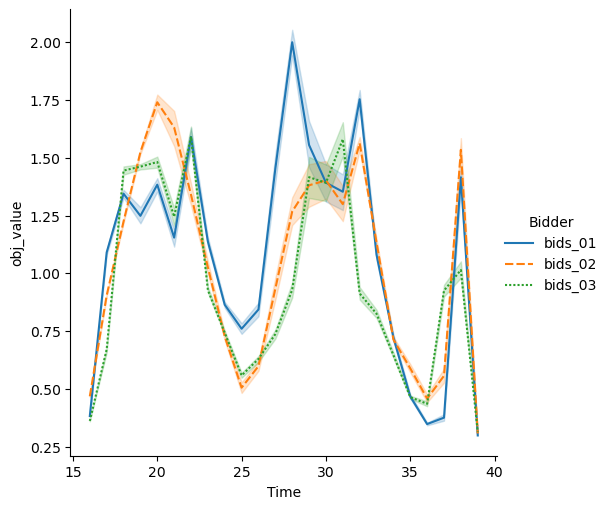

In [142]:
ax= sns.relplot(data=df2, x='Time', y='obj_value',kind='line', hue='Bidder', style='Bidder');


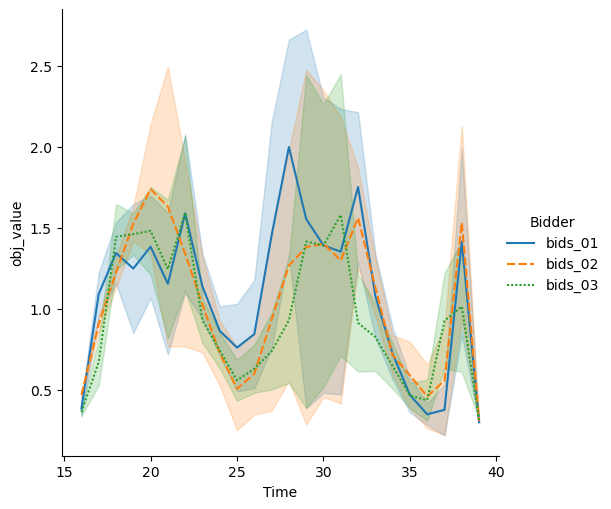

In [120]:
ax= sns.relplot(data=df2, x='Time', y='obj_value', kind='line', ci='sd', hue='Bidder', style='Bidder');

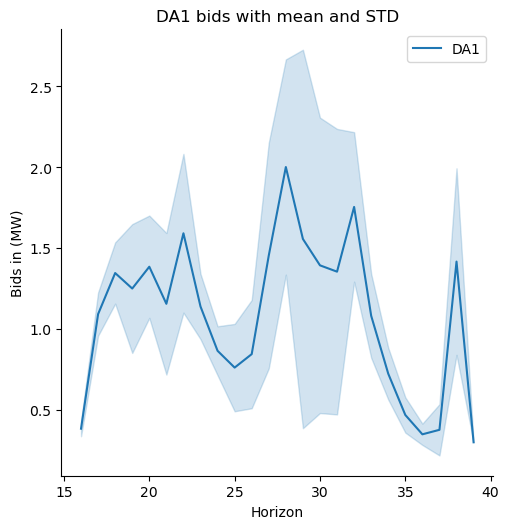

In [151]:
ax= sns.relplot(data=df2[df2.Bidder=='bids_01'], x='Time', y='obj_value', kind='line', ci='sd', hue='Bidder', style='Bidder',legend=False);
ax.set(xlabel='Horizon', title='DA1 bids with mean and STD', ylabel='Bids in (MW)');
plt.legend(loc='upper right', labels=['DA1'])
ax.savefig('DA1_bids_STD_plot.png', dpi=100)

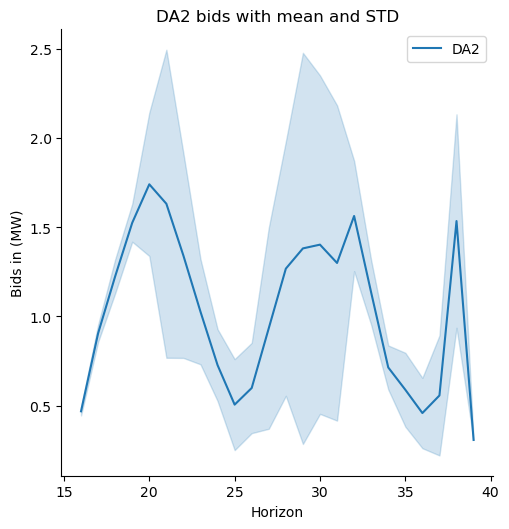

In [150]:
ax= sns.relplot(data=df2[df2.Bidder=='bids_02'], x='Time', y='obj_value', kind='line', ci='sd', hue='Bidder', style='Bidder',legend=False);
ax.set(xlabel='Horizon', title='DA2 bids with mean and STD', ylabel='Bids in (MW)');
plt.legend(loc='upper right', labels=['DA2'])
ax.savefig('DA2_bids_STD_plot.png', dpi=100)

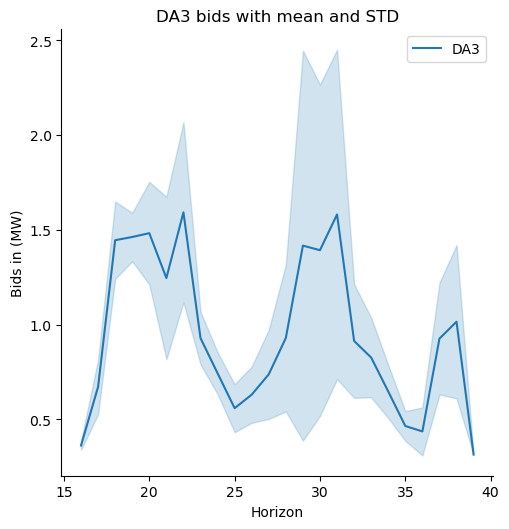

In [149]:
ax= sns.relplot(data=df2[df2.Bidder=='bids_03'], x='Time', y='obj_value', kind='line', ci='sd', hue='Bidder', style='Bidder', legend=False);
ax.set(xlabel='Horizon', title='DA3 bids with mean and STD', ylabel='Bids in (MW)');
plt.legend(loc='upper right', labels=['DA3'])
ax.savefig('DA3_bids_STD_plot.png', dpi=100)